In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression #Lasso回归、岭回归，线性回归，逻辑回归
from sklearn.model_selection import train_test_split #自动进行切割
from sklearn.model_selection import GridSearchCV #表格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor #KNN回归
from sklearn.ensemble import ExtraTreesRegressor #随机森林
import sklearn.datasets as datasets #导入内置数据
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
faces = datasets.fetch_olivetti_faces() #抓取人脸数据
data = faces.data #数据
images = faces.images #图片
print(data.shape, images.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\dell\scikit_learn_data
(400, 4096) (400, 64, 64)


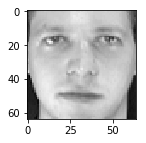

In [3]:
plt.figure(figsize=(3,2))
plt.imshow(images[0], cmap="gray")

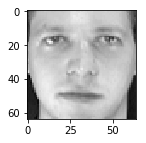

In [4]:
data[0]
plt.figure(figsize=(3, 2))
plt.imshow(data[0].reshape(64, 64), cmap="gray")

In [5]:
target = faces.target
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [6]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [8]:
target < 30

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

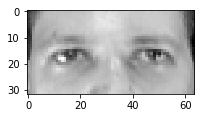

In [9]:
# 400张脸，300个完整的人脸，100个残缺
train = data[target < 30] #300个人脸
test = data[target >= 30]
x_train = train[:, :2048]
y_train = train[:, 2048:] #一半的人脸，整个人脸应该是64*64=4096，2048表示一半的人脸
face_upper = x_train[0].reshape((32, 64))
plt.figure(figsize=(3, 2))
plt.imshow(face_upper, cmap="gray")

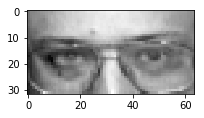

In [10]:
x_test = test[:, :2048]
y_test = test[:, 2048:] #测试数据
face_upper = x_test[0].reshape((32, 64))
plt.figure(figsize=(3, 2))
plt.imshow(face_upper, cmap="gray")

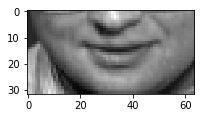

In [11]:
face_down = y_test[0].reshape((32, 64))
plt.figure(figsize=(3, 2))
plt.imshow(face_down, cmap="gray")

In [13]:
Estimator = {"KNN": KNeighborsRegressor(),
             "LinearRG": LinearRegression(),
             "Ridge": Ridge(),
             "ExtraTree": ExtraTreesRegressor()} #机器学习字典
y_predicts = dict() #预测之后的数据保存到一个字典
for key, estimator in Estimator.items():
    estimator.fit(x_train, y_train) #训练数据
    y_new = estimator.predict(x_test) #预测数据
    y_predicts[key] = y_new #结果保存为字典
face_id = np.random.randint(0, 100, size=5)
face_id

d:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([56, 28, 36, 12, 89])

No handles with labels found to put in legend.


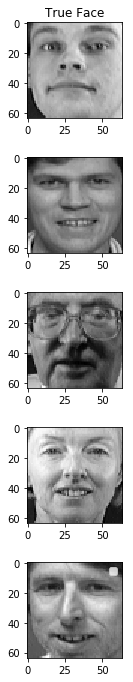

In [15]:
# 图片2，2.4
# 5个数据， 5行
# 4个算法+真实图片， 5列
plt.figure(figsize=(6*2, 5*2.4))
for i in range(5):
    if i:
        axes = plt.subplot(5, 6, i*6+1)
    else:
        axes = plt.subplot(5, 6, i*6+1, title="True Face")
    axes.imshow(test[face_id[i]].reshape(64,64),cmap="gray")
plt.legend()
plt.show()

No handles with labels found to put in legend.


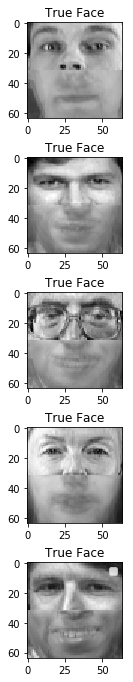

In [22]:
plt.figure(figsize=(6*2, 5*2.4))
for i in range(5):
    for j, k in enumerate(y_predicts):
        j = 0
        key = "KNN"
        key = "LinearRG"
        key = "ExtraTree"
        key = "Ridge"
        axes = plt.subplot(5, 6, i*6+j+1, title="True Face")
        face_up = x_test[face_id[i]] #上半部分
        face_down = (y_predicts[key])[face_id[i]] #下半部分
        face = np.hstack((face_up, face_down)).reshape(64, 64)
        axes.imshow(face, cmap="gray")
plt.legend()
plt.show()

In [15]:
# 这个是把gif格式的图片下下来之后再进行处理得到训练集和测试集，而上面那个是datasets.fetch_olivetti_face方式在线下载获取
# 人脸图像，再简单处理就获得了各个单独图片
import numpy
import pandas
from PIL import Image
from keras import backend as K
from keras.utils import np_utils


"""
加载图像数据的函数,dataset_path即图像olivettifaces的路径
加载olivettifaces后，划分为train_data,valid_data,test_data三个数据集
函数返回train_data,valid_data,test_data以及对应的label
"""

# 400个样本，40个人，每人10张样本图。每张样本图高57*宽47，需要2679个像素点。每个像素点做了归一化处理
def load_data(dataset_path):
    img = Image.open(dataset_path)
    img_ndarray = numpy.asarray(img, dtype='float64') / 256
    print(img_ndarray.shape)
    faces = numpy.empty((400,57,47))
    for row in range(20):
        for column in range(20):
            faces[row * 20 + column] = img_ndarray[row * 57:(row + 1) * 57, column * 47:(column + 1) * 47]
    # 设置400个样本图的标签
    label = numpy.empty(400)
    for i in range(40):
        label[i * 10:i * 10 + 10] = i
    label = label.astype(numpy.int)
    label = np_utils.to_categorical(label, 40)  # 将40分类类标号转化为one-hot编码

    # 分成训练集、验证集、测试集，大小如下
    train_data = numpy.empty((320, 57,47))   # 320个训练样本
    train_label = numpy.empty((320,40))   # 320个训练样本，每个样本40个输出概率
    valid_data = numpy.empty((40, 57,47))   # 40个验证样本
    valid_label = numpy.empty((40,40))   # 40个验证样本，每个样本40个输出概率
    test_data = numpy.empty((40, 57,47))   # 40个测试样本
    test_label = numpy.empty((40,40))  # 40个测试样本，每个样本40个输出概率

    for i in range(40):
        train_data[i * 8:i * 8 + 8] = faces[i * 10:i * 10 + 8]
        train_label[i * 8:i * 8 + 8] = label[i * 10:i * 10 + 8]
        valid_data[i] = faces[i * 10 + 8]
        valid_label[i] = label[i * 10 + 8]
        test_data[i] = faces[i * 10 + 9]
        test_label[i] = label[i * 10 + 9]

    return [(train_data, train_label), (valid_data, valid_label),(test_data, test_label)]


if __name__ == '__main__':
    [(train_data, train_label), (valid_data, valid_label), (test_data, test_label)] = load_data('olivettifaces.gif')
    oneimg = train_data[0]*256
    print(oneimg)
    im = Image.fromarray(oneimg)
    im.show()

e:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(1140, 942)
[[ 48.  45.  49. ...  51.  56. 246.]
 [ 45.  42.  51. ...  51.  53. 246.]
 [ 46.  47.  48. ...  38.  53. 246.]
 ...
 [ 45.  43.  48. ...  48.  48. 246.]
 [ 45.  49.  50. ...  45.  47. 246.]
 [246. 246. 246. ... 246. 246. 246.]]
